In [1]:
# importing libraries
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# printing numbers in array's
np.set_printoptions(suppress=True)

In [2]:
# Problem 1 & 2

def compute_loss(X,y,theta):
#    **** Computes the loss function for linear regression ****
    h = X.dot(theta) # h = predictions
    errors = np.subtract(h,y)
    sqrErrors = np.square(errors)
    J = 1/(2*m) * np.sum(sqrErrors)
    return J

def gradient_descent(X_train,X_test,Y_train,Y_test,theta,alpha,iterations):
#    **** Computes the Gradient Descent for linear regression ****
    loss_history_train = np.zeros(iterations)
    loss_history_test = np.zeros(iterations)
    for i in range(iterations):
        h = X_train.dot(theta)
        errors = np.subtract(h,Y_train)
        sum_delta = (alpha/m) * X_train.transpose().dot(errors);
        theta = theta - sum_delta;
        loss_history_train[i] = compute_loss(X_train,Y_train,theta)
        loss_history_test[i] = compute_loss(X_test,Y_test,theta)
    return loss_history_train, loss_history_test, theta

def binary_map(x):
#    **** Computes the inputs for 1(yes) or 0(no) ****
    return x.map({'yes': 1, 'no': 0})

In [3]:
# Problem 1.a
# Code that predicts housing price based on input variables
# Inputs: area, bedrooms, bathrooms, stories, parking

# Reads csv file and sets it to the variable housing
housing = pd.DataFrame(pd.read_csv("Housing.csv", usecols = ["price","area","bedrooms","bathrooms","stories","parking"]))
housing = housing.to_numpy()

# Splits the training/validation set
np.random.seed(0) 
train, test = train_test_split(housing, train_size = 0.8, test_size = 0.2, random_state = 42)

m = len(train) # Number of values in dataset

# Spliting the inputs and output
Y_train = train[:,0]
X_train = train[:,1:]
Y_test = test[:,0]
X_test = test[:,1:]

# Adding X0 to X_train and X_test
X0 = np.ones((len(X_train),1))
X_train = np.hstack((X0, X_train))
X0 = np.ones((len(X_test),1))
X_test = np.hstack((X0, X_test))

In [4]:
# Calculating theta
theta = np.zeros(6)
alpha = 1e-10
iterations = 1000
loss_history_train, loss_history_test, theta = gradient_descent(X_train,X_test,Y_train,Y_test,theta,alpha,iterations)
print("Theta for X= ", theta)

Theta for X=  [  0.17034178 801.88926281   0.53788622   0.24806391   0.35677608
   0.13663819]


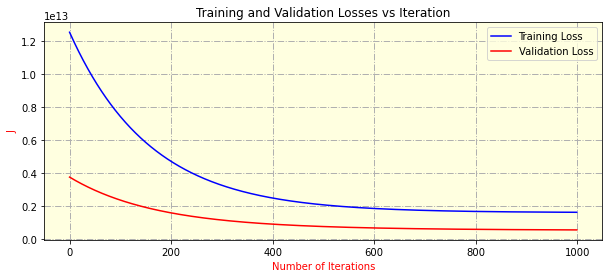

In [5]:
# Plotting the Loss vs Iterations
plt.rcParams.update({'axes.facecolor':'lightyellow'})
plt.rcParams['figure.figsize'] = [10, 4]
plt.figure()
plt.plot(loss_history_train[0:len(loss_history_train)], color='blue', label="Training Loss")
plt.plot(loss_history_test[0:len(loss_history_test)], color='red', label="Validation Loss")
plt.grid(linestyle='-.', linewidth='1')
plt.xlabel("Number of Iterations", color='red')
plt.ylabel("J", color='red')
plt.title("Training and Validation Losses vs Iteration")
plt.legend();

In [6]:
# Problem 1.b
# Code that predicts housing price based on input variables
# Inputs: area, bedrooms, bathrooms, stories, mainroad, guestroom, basement, hotwaterheating, airconditioning, parking, prefarea

# Reads csv file and sets it to the variable housing
housing = pd.DataFrame(pd.read_csv("Housing.csv", usecols = ["price","area","bedrooms","bathrooms","stories","mainroad","guestroom","basement","hotwaterheating","airconditioning","parking","prefarea"]))
binarylist = ["mainroad","guestroom","basement","hotwaterheating","airconditioning","prefarea",]
housing[binarylist] = housing[binarylist].apply(binary_map)
housing = housing.to_numpy()

# Splits the training/validation set
np.random.seed(0) 
train, test = train_test_split(housing, train_size = 0.8, test_size = 0.2, random_state = 42)

m = len(train) # Number of values in dataset

# Spliting the inputs and output
Y_train = train[:,0]
X_train = train[:,1:]
Y_test = test[:,0]
X_test = test[:,1:]

# Adding X0 to X_train and X_test
X0 = np.ones((len(X_train),1))
X_train = np.hstack((X0, X_train))
X0 = np.ones((len(X_test),1))
X_test = np.hstack((X0, X_test))

In [7]:
# Calculating theta
theta = np.zeros(12)
alpha = 1e-10
iterations = 1000
loss_history_train, loss_history_test, theta = gradient_descent(X_train,X_test,Y_train,Y_test,theta,alpha,iterations)
print("Theta for X=: ", theta)

Theta for X=:  [  0.17034178 801.88923418   0.5378862    0.2480639    0.35677607
   0.1517083    0.03962217   0.07584896   0.01161261   0.07773618
   0.13663819   0.05086062]


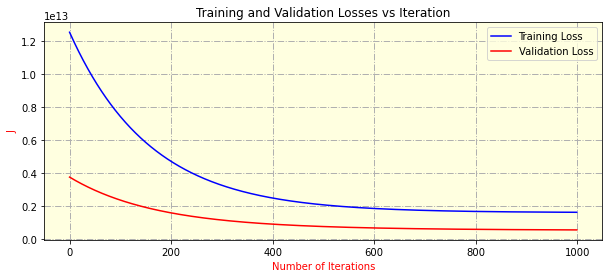

In [8]:
# Plotting the Loss vs Iterations
plt.rcParams['figure.figsize'] = [10, 4]
plt.figure()
plt.plot(loss_history_train[0:len(loss_history_train)], color='blue', label="Training Loss")
plt.plot(loss_history_test[0:len(loss_history_test)], color='red', label="Validation Loss")
plt.grid(linestyle='-.', linewidth='1')
plt.xlabel("Number of Iterations", color='red')
plt.ylabel("J", color='red')
plt.title("Training and Validation Losses vs Iteration")
plt.legend();

In [9]:
# Problem 2.a
# Repeat 1.a

# Reads csv file and sets it to the variable housing
housing = pd.DataFrame(pd.read_csv("Housing.csv", usecols = ["price","area","bedrooms","bathrooms","stories","parking"]))
housing = housing.to_numpy()

# Splits the training/validation set
np.random.seed(0) 
train, test = train_test_split(housing, train_size = 0.8, test_size = 0.2, random_state = 42)

m = len(train) # Number of values in dataset

# Feature Scaling
# Standardization
scaler = StandardScaler()
std_train = scaler.fit_transform(train) 
std_test = scaler.fit_transform(test)

# Normalization
scaler = MinMaxScaler()
norm_train = scaler.fit_transform(train)
norm_test = scaler.fit_transform(test)

# Normalization: Spliting the inputs and output
Y_train_norm = norm_train[:,0]
X_train_norm = norm_train[:,1:]
Y_test_norm = norm_test[:,0]
X_test_norm = norm_test[:,1:]

# Adding X0 to X_train_norm and X_test_norm
X0 = np.ones((len(X_train_norm),1))
X_train_norm = np.hstack((X0, X_train_norm))
X0 = np.ones((len(X_test_norm),1))
X_test_norm = np.hstack((X0, X_test_norm))


# Standardization: Spliting the inputs and output
Y_train_std = std_train[:,0]
X_train_std = std_train[:,1:]
Y_test_std = std_test[:,0]
X_test_std = std_test[:,1:]

# Adding X0 to X_train_norm and X_test_norm
X0 = np.ones((len(X_train_std),1))
X_train_std = np.hstack((X0, X_train_std))
X0 = np.ones((len(X_test_std),1))
X_test_std = np.hstack((X0, X_test_std))

In [10]:
# Calculating theta
theta = np.zeros(6)
alpha = 0.01
iterations = 1000
loss_history_train_norm, loss_history_test_norm, theta = gradient_descent(X_train_norm,X_test_norm,Y_train_norm,Y_test_norm,theta,alpha,iterations)
print("Normalization: Theta for X: ", theta)

Normalization: Theta for X:  [0.14737284 0.12869681 0.10045304 0.10493464 0.12497818 0.11646828]


In [11]:
# Calculating theta
theta = np.zeros(6)
alpha = 0.01
iterations = 300
loss_history_train_std, loss_history_test_std, theta = gradient_descent(X_train_std,X_test_std,Y_train_std,Y_test_std,theta,alpha,iterations)
print("Standardization: Theta for X: ", theta)

Standardization: Theta for X:  [-0.          0.36848219  0.0927875   0.30827885  0.22764174  0.17520808]


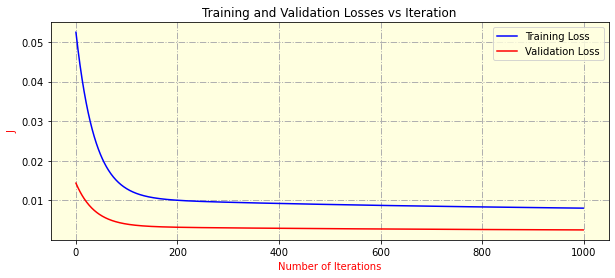

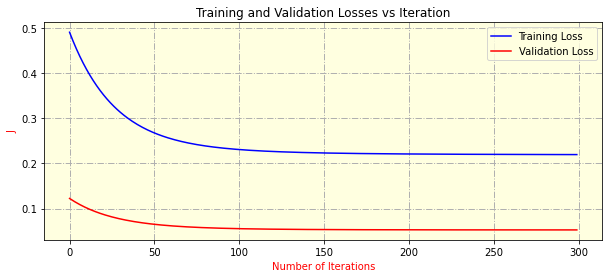

In [12]:
# Plotting the Loss vs Iterations
plt.rcParams['figure.figsize'] = [10, 4]
plt.figure()
plt.plot(loss_history_train_norm[0:len(loss_history_train_norm)], color='blue', label="Training Loss")
plt.plot(loss_history_test_norm[0:len(loss_history_test_norm)], color='red', label="Validation Loss")
plt.grid(linestyle='-.', linewidth='1')
plt.xlabel("Number of Iterations", color='red')
plt.ylabel("J", color='red')
plt.title("Training and Validation Losses vs Iteration")
plt.legend();

plt.rcParams['figure.figsize'] = [10, 4]
plt.figure()
plt.plot(loss_history_train_std[0:len(loss_history_train_std)], color='blue', label="Training Loss")
plt.plot(loss_history_test_std[0:len(loss_history_test_std)], color='red', label="Validation Loss")
plt.grid(linestyle='-.', linewidth='1')
plt.xlabel("Number of Iterations", color='red')
plt.ylabel("J", color='red')
plt.title("Training and Validation Losses vs Iteration")
plt.legend();

In [13]:
# Problem 2.b
# Repeat 1.b

# Reads csv file and sets it to the variable housing
housing = pd.DataFrame(pd.read_csv("Housing.csv", usecols = ["price","area","bedrooms","bathrooms","stories","mainroad","guestroom","basement","hotwaterheating","airconditioning","parking","prefarea"]))
binarylist = ["mainroad","guestroom","basement","hotwaterheating","airconditioning","prefarea",]
housing[binarylist] = housing[binarylist].apply(binary_map)

# Splits the training/validation set
np.random.seed(0) 
train, test = train_test_split(housing, train_size = 0.8, test_size = 0.2, random_state = 42)

m = len(train) # Number of values in dataset


# Feature Scaling
# Standardization
scaler = StandardScaler()
std_train = scaler.fit_transform(train) 
std_test = scaler.fit_transform(test)

# Normalization
scaler = MinMaxScaler()
norm_train = scaler.fit_transform(train)
norm_test = scaler.fit_transform(test)

# Normalization: Spliting the inputs and output
Y_train_norm = norm_train[:,0]
X_train_norm = norm_train[:,1:]
Y_test_norm = norm_test[:,0]
X_test_norm = norm_test[:,1:]

# Adding X0 to X_train_norm and X_test_norm
X0 = np.ones((len(X_train_norm),1))
X_train_norm = np.hstack((X0, X_train_norm))
X0 = np.ones((len(X_test_norm),1))
X_test_norm = np.hstack((X0, X_test_norm))


# Standardization: Spliting the inputs and output
Y_train_std = std_train[:,0]
X_train_std = std_train[:,1:]
Y_test_std = std_test[:,0]
X_test_std = std_test[:,1:]

# Adding X0 to X_train_norm and X_test_norm
X0 = np.ones((len(X_train_std),1))
X_train_std = np.hstack((X0, X_train_std))
X0 = np.ones((len(X_test_std),1))
X_test_std = np.hstack((X0, X_test_std))

In [14]:
# Calculating theta
theta = np.zeros(12)
alpha = 0.01
iterations = 200
loss_history_train_norm, loss_history_test_norm, theta = gradient_descent(X_train_norm,X_test_norm,Y_train_norm,Y_test_norm,theta,alpha,iterations)
print("Normalization: Theta for X: ", theta)

Normalization: Theta for X:  [0.09876011 0.0424534  0.05090327 0.03078117 0.05176705 0.09257468
 0.03097753 0.04277407 0.01129761 0.06826281 0.04467065 0.04124511]


In [15]:
# Calculating theta
theta = np.zeros(12)
alpha = 0.01
iterations = 200
loss_history_train_std, loss_history_test_std, theta = gradient_descent(X_train_std,X_test_std,Y_train_std,Y_test_std,theta,alpha,iterations)
print("Standardization: Theta for X: ", theta)

Standardization: Theta for X:  [-0.          0.26594958  0.08607623  0.27024643  0.1815811   0.10231378
  0.07806291  0.09593823  0.07490202  0.20734946  0.13716038  0.14142746]


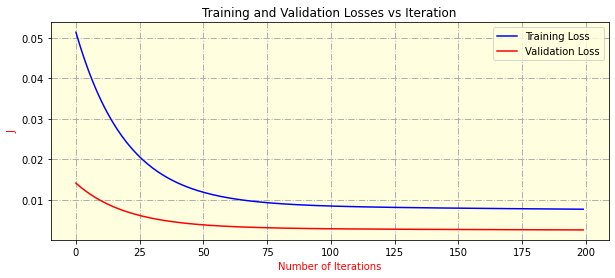

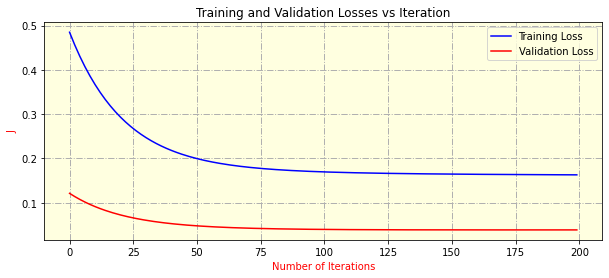

In [16]:
# Plotting the Loss vs Iterations
plt.rcParams['figure.figsize'] = [10, 4]
plt.figure()
plt.plot(loss_history_train_norm[0:len(loss_history_train_norm)], color='blue', label="Training Loss")
plt.plot(loss_history_test_norm[0:len(loss_history_test_norm)], color='red', label="Validation Loss")
plt.grid(linestyle='-.', linewidth='1')
plt.xlabel("Number of Iterations", color='red')
plt.ylabel("J", color='red')
plt.title("Training and Validation Losses vs Iteration")
plt.legend();

plt.rcParams['figure.figsize'] = [10, 4]
plt.figure()
plt.plot(loss_history_train_std[0:len(loss_history_train_std)], color='blue', label="Training Loss")
plt.plot(loss_history_test_std[0:len(loss_history_test_std)], color='red', label="Validation Loss")
plt.grid(linestyle='-.', linewidth='1')
plt.xlabel("Number of Iterations", color='red')
plt.ylabel("J", color='red')
plt.title("Training and Validation Losses vs Iteration")
plt.legend();

In [17]:
# Problem 3

def compute_loss_train(X,y,theta):
#    **** Computes the loss function for linear regression with regularization ****   
    h = X.dot(theta)
    errors = np.subtract(h,y)
    sqrErrors = np.square(errors)
    reg = np.square(theta[1:])
    reg = np.insert(reg, 0, theta[:1], axis=0)
    J = 1/(2*m) * ((np.sum(sqrErrors)) + (np.sum(reg)))
    return J

def compute_loss_test(X,y,theta):
#    **** Computes the loss function for linear regression with regularization****
    h = X.dot(theta)
    errors = np.subtract(h,y)
    sqrErrors = np.square(errors)
    J = 1/(2*m) * (np.sum(sqrErrors))
    return J

In [18]:
# Problem 3.a
# Repeat problem 2.a

# Reads csv file and sets it to the variable housing
housing = pd.DataFrame(pd.read_csv("Housing.csv", usecols = ["price","area","bedrooms","bathrooms","stories","parking"]))

# Splits the training/validation set
np.random.seed(0) 
train, test = train_test_split(housing, train_size = 0.8, test_size = 0.2, random_state = 42)

m = len(train) # Number of values in dataset

# Feature Scaling
# Standardization
scaler = StandardScaler()
std_train = scaler.fit_transform(train) 
std_test = scaler.fit_transform(test)

# Normalization
scaler = MinMaxScaler()
norm_train = scaler.fit_transform(train)
norm_test = scaler.fit_transform(test)

# Normalization: Spliting the inputs and output
Y_train_norm = norm_train[:,0]
X_train_norm = norm_train[:,1:]
Y_test_norm = norm_test[:,0]
X_test_norm = norm_test[:,1:]

# Adding X0 to X_train_norm and X_test_norm
X0 = np.ones((len(X_train_norm),1))
X_train_norm = np.hstack((X0, X_train_norm))
X0 = np.ones((len(X_test_norm),1))
X_test_norm = np.hstack((X0, X_test_norm))

# Standardization: Spliting the inputs and output
Y_train_std = std_train[:,0]
X_train_std = std_train[:,1:]
Y_test_std = std_test[:,0]
X_test_std = std_test[:,1:]

# Adding X0 to X_train_norm and X_test_norm
X0 = np.ones((len(X_train_std),1))
X_train_std = np.hstack((X0, X_train_std))
X0 = np.ones((len(X_test_std),1))
X_test_std = np.hstack((X0, X_test_std))

In [19]:
# Calculating theta
theta = np.zeros(6)
alpha = 0.01
iterations = 500
loss_history_train_norm, loss_history_test_norm, theta = gradient_descent(X_train_norm,X_test_norm,Y_train_norm,Y_test_norm,theta,alpha,iterations)
print("Normalization: Theta for X: ", theta)

Normalization: Theta for X:  [0.17481149 0.09372845 0.09470379 0.06756522 0.10030015 0.09256542]


In [20]:
# Calculating theta
theta = np.zeros(6)
alpha = 0.01
iterations = 200
loss_history_train_std, loss_history_test_std, theta = gradient_descent(X_train_std,X_test_std,Y_train_std,Y_test_std,theta,alpha,iterations)
print("Standardization: Theta for X: ", theta)

Standardization: Theta for X:  [-0.          0.3447005   0.11280093  0.29434454  0.21652186  0.17952526]


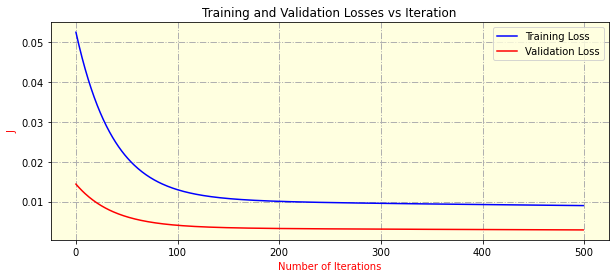

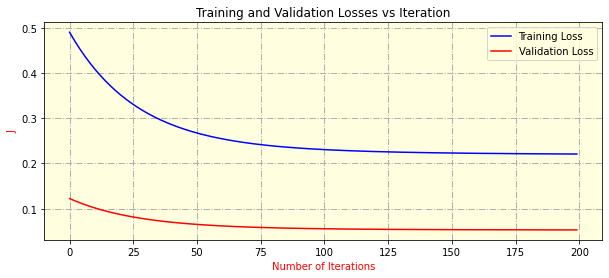

In [21]:
# Plotting the Loss vs Iterations
plt.rcParams['figure.figsize'] = [10, 4]
plt.figure()
plt.plot(loss_history_train_norm[0:len(loss_history_train_norm)], color='blue', label="Training Loss")
plt.plot(loss_history_test_norm[0:len(loss_history_test_norm)], color='red', label="Validation Loss")
plt.grid(linestyle='-.', linewidth='1')
plt.xlabel("Number of Iterations", color='red')
plt.ylabel("J", color='red')
plt.title("Training and Validation Losses vs Iteration")
plt.legend();

plt.rcParams['figure.figsize'] = [10, 4]
plt.figure()
plt.plot(loss_history_train_std[0:len(loss_history_train_std)], color='blue', label="Training Loss")
plt.plot(loss_history_test_std[0:len(loss_history_test_std)], color='red', label="Validation Loss")
plt.grid(linestyle='-.', linewidth='1')
plt.xlabel("Number of Iterations", color='red')
plt.ylabel("J", color='red')
plt.title("Training and Validation Losses vs Iteration")
plt.legend();

In [22]:
# Problem 3.b
# Repeat problem 2.b 

# Reads csv file and sets it to the variable housing
housing = pd.DataFrame(pd.read_csv("Housing.csv", usecols = ["price","area","bedrooms","bathrooms","stories","mainroad","guestroom","basement","hotwaterheating","airconditioning","parking","prefarea"]))
binarylist = ["mainroad","guestroom","basement","hotwaterheating","airconditioning","prefarea",]
housing[binarylist] = housing[binarylist].apply(binary_map)

# Splits the training/validation set
np.random.seed(0) 
train, test = train_test_split(housing, train_size = 0.8, test_size = 0.2, random_state = 42)

m = len(train) # Number of values in dataset

# Feature Scaling
# Standardization
scaler = StandardScaler()
std_train = scaler.fit_transform(train) 
std_test = scaler.fit_transform(test)

# Normalization
scaler = MinMaxScaler()
norm_train = scaler.fit_transform(train)
norm_test = scaler.fit_transform(test)

# Normalization: Spliting the inputs and output
Y_train_norm = norm_train[:,0]
X_train_norm = norm_train[:,1:]
Y_test_norm = norm_test[:,0]
X_test_norm = norm_test[:,1:]

# Adding X0 to X_train_norm and X_test_norm
X0 = np.ones((len(X_train_norm),1))
X_train_norm = np.hstack((X0, X_train_norm))
X0 = np.ones((len(X_test_norm),1))
X_test_norm = np.hstack((X0, X_test_norm))

# Standardization: Spliting the inputs and output
Y_train_std = std_train[:,0]
X_train_std = std_train[:,1:]
Y_test_std = std_test[:,0]
X_test_std = std_test[:,1:]

# Adding X0 to X_train_norm and X_test_norm
X0 = np.ones((len(X_train_std),1))
X_train_std = np.hstack((X0, X_train_std))
X0 = np.ones((len(X_test_std),1))
X_test_std = np.hstack((X0, X_test_std))

In [23]:
# Calculating theta
theta = np.zeros(12)
alpha = 0.01
iterations = 200
loss_history_train_norm, loss_history_test_norm, theta = gradient_descent(X_train_norm,X_test_norm,Y_train_norm,Y_test_norm,theta,alpha,iterations)
print("Normalization: Theta for X: ", theta)

Normalization: Theta for X:  [0.09876011 0.0424534  0.05090327 0.03078117 0.05176705 0.09257468
 0.03097753 0.04277407 0.01129761 0.06826281 0.04467065 0.04124511]


In [24]:
# Calculating theta
theta = np.zeros(12)
alpha = 0.01
iterations = 200
loss_history_train_std, loss_history_test_std, theta = gradient_descent(X_train_std,X_test_std,Y_train_std,Y_test_std,theta,alpha,iterations)
print("Standardization: Theta for X: ", theta)

Standardization: Theta for X:  [-0.          0.26594958  0.08607623  0.27024643  0.1815811   0.10231378
  0.07806291  0.09593823  0.07490202  0.20734946  0.13716038  0.14142746]


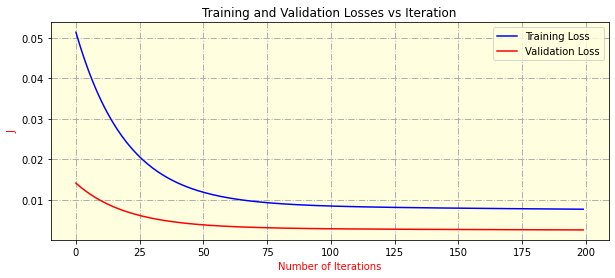

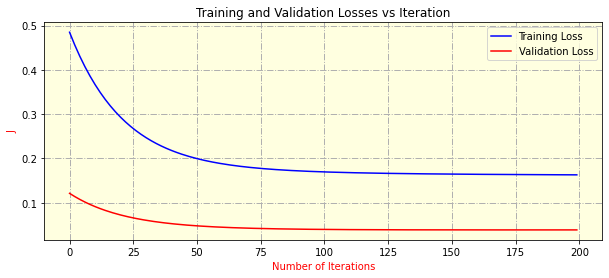

In [25]:
# Plotting the Loss vs Iterations
plt.rcParams['figure.figsize'] = [10, 4]
plt.figure()
plt.plot(loss_history_train_norm[0:len(loss_history_train_norm)], color='blue', label="Training Loss")
plt.plot(loss_history_test_norm[0:len(loss_history_test_norm)], color='red', label="Validation Loss")
plt.grid(linestyle='-.', linewidth='1')
plt.xlabel("Number of Iterations", color='red')
plt.ylabel("J", color='red')
plt.title("Training and Validation Losses vs Iteration")
plt.legend();

plt.rcParams['figure.figsize'] = [10, 4]
plt.figure()
plt.plot(loss_history_train_std[0:len(loss_history_train_std)], color='blue', label="Training Loss")
plt.plot(loss_history_test_std[0:len(loss_history_test_std)], color='red', label="Validation Loss")
plt.grid(linestyle='-.', linewidth='1')
plt.xlabel("Number of Iterations", color='red')
plt.ylabel("J", color='red')
plt.title("Training and Validation Losses vs Iteration")
plt.legend();